In [1]:
# import math

# #Default unit is km
# earth_radius = 6378

# plane_max_cruising_altitude = 13
# plane_min_angle = math.radians(10) #rad


# #Inputs
# orbit_height = 1000


# #Compute the radial distance between two reachable extremes in radians
# rad = 2 * (math.pi/2 - plane_min_angle - math.asin(math.sin(math.pi/2 + plane_min_angle)*(earth_radius+plane_max_cruising_altitude)/(earth_radius+orbit_height)))

# #Max length (diagonal) of a sector in radians
# sector_max_length = rad / 5

# #Max sector side length
# sector_max_side = sector_max_length * math.sqrt(0.75) / 2

# #sectors around the equator
# sector_belt_count = math.ceil(2* math.pi / sector_max_side)

# print(sector_belt_count)

In [2]:
import math

#Default unit is km
earth_radius = 6378

plane_max_cruising_altitude = 13
plane_min_angle = math.radians(10) #rad


#Inputs
orbit_height = 20000


#Compute the radial distance between two reachable extremes in radians
rad = 2 * (math.pi/2 - plane_min_angle - math.asin(math.sin(math.pi/2 + plane_min_angle)*(earth_radius+plane_max_cruising_altitude)/(earth_radius+orbit_height)))

#Max length (diagonal) of a sector in radians
sector_max_length = rad / 5

#Max horizontal spacing between two sectors
sector_max_width = sector_max_length * 0.75

#sectors around the equator
sector_equator_count = math.ceil(math.pi / sector_max_width)

#Determine actual sector size
sector_width = math.pi / sector_equator_count
sector_length = sector_width * 4/3

#Diamater of inscribed circle (a.k.a. h)
sector_h = sector_length * math.sqrt(0.75)

#note the 2* (from 2*pi) outside of the ceil(). This guarantees an even Number.
sector_belt_count = 2 * math.ceil(math.pi / sector_h)

print(f"Distinct Belts: {sector_equator_count}")
print(f"Sector size efficiency: {sector_width/sector_max_width}")
print(f"Sectors per Belt: {sector_belt_count}")
print(f"Total Satellites: {sector_equator_count * sector_belt_count/2:.0f}")

Distinct Belts: 10
Sector size efficiency: 0.9064017032397537
Sectors per Belt: 18
Total Satellites: 90


In [3]:
import math

#Default unit is km
earth_radius = 6378

plane_max_cruising_altitude = 13
plane_min_angle = math.radians(10) #rad


#Inputs
orbit_height = 19000


#Compute the radial distance between two reachable extremes in radians
rad = 2 * (math.pi/2 - plane_min_angle - math.asin(math.sin(math.pi/2 + plane_min_angle)*(earth_radius+plane_max_cruising_altitude)/(earth_radius+orbit_height)))

#Max length (diagonal) of a sector in radians
sector_max_length = rad / 5

#Max horizontal spacing between two sectors
sector_max_width = sector_max_length * 0.75

#sectors around the equator
sector_equator_count = math.ceil(math.pi / sector_max_width)

#Determine actual sector size
sector_width = math.pi / sector_equator_count
sector_length = sector_width * 4/3

#Diamater of inscribed circle (a.k.a. h)
sector_max_h = sector_length * math.sqrt(0.75)

#note the 6* (from 6*pi/3) outside of the ceil(). This guarantees a Number divisible by 6.
sector_belt_count =  6*math.ceil(math.pi / (sector_max_h*3))

sector_h =  math.pi / sector_belt_count

print(f"Distinct Belts: {sector_equator_count}")
print(f"Sector size efficiency: {sector_width/sector_max_width}")
print(f"Sectors per Belt: {sector_belt_count}")
print("sector_h:", sector_h)
y_radiant_per_belt = sector_h
x_radiant_per_belt = 2*sector_width
print("2 x sector_width: ", 2*sector_width)
print(f"Sector height efficiency: {sector_h/sector_max_h}")
print(f"Total Satellites: {sector_equator_count * sector_belt_count/2:.0f}")
print("sector_max_width:", sector_max_width)

Distinct Belts: 10
Sector size efficiency: 0.9140708271677093
Sectors per Belt: 18
sector_h: 0.17453292519943295
2 x sector_width:  0.6283185307179586
Sector height efficiency: 0.4811252243246882
Total Satellites: 90
sector_max_width: 0.34369247548619


In [4]:
import numpy as np

def cell(left, right):
    cell_center = np.array([left, right])
    return cell_center

def cell_corners(cell_center):
    cell_center
    return cell_corners

# Alpha Cell
alpha = np.array([0,0]) 
beta = np.array([0,0]) 
print("SEC: ", sector_equator_count)
#number_belt= sector_equator_count/2
list_position = [[0,0]]
for i in range(int(sector_equator_count/2.0)):
    beta = np.add(beta, np.array([2*sector_width, 0]))
    #print("Beta: ", beta)
    list_position= np.append(list_position, [beta] , axis=0)
    #print("Alpha:", alpha)
    ##list_position = np.append(alpha, beta, axis=0)
    #print("Beta: ", beta)
    alpha = beta
    #list_position = list_position[0]
print(list_position)

from collections import defaultdict
mean_coordinates = []
mean_coordinates_dict = defaultdict(lambda:np.empty((0,2),float))
for y_belt_count in range(int(sector_belt_count)):
#     for x_belt_count in range(int(sector_equator_count/2.0)):
# #         beta = np.add(beta, np.array([2*sector_width, 0]))
# #         list_position= np.append(list_position, [beta] , axis=0)
# #         alpha = beta
#         x_radiant = (x_belt_count +(y_belt_count%2)) * x_radiant_per_belt 
#         y_radiant = y_belt_count * y_radiant_per_belt 
#         mean_coordinates.append([x_radiant, y_radiant])
# #         mean_coordinates_dict[f"layer {y_belt_count}"].append([x_radiant, y_radiant])
#         np.hstack((mean_coordinates_dict[f"layer {y_belt_count}"],[x_radiant, y_radiant]))
        mean_coordinates_dict[f"layer {y_belt_count}"] = np.vstack([[(x_belt_count +(y_belt_count%2)/2) * x_radiant_per_belt,
                                                                    y_belt_count * y_radiant_per_belt]] 
                                                                   for x_belt_count in range(int(sector_equator_count/2.0)))


    

#print(2*sector_max_width)
print(mean_coordinates_dict)
print(mean_coordinates_dict["layer 0"].shape)

SEC:  10
[[0.         0.        ]
 [0.62831853 0.        ]
 [1.25663706 0.        ]
 [1.88495559 0.        ]
 [2.51327412 0.        ]
 [3.14159265 0.        ]]
defaultdict(<function <lambda> at 0x00000135B2DCD5E8>, {'layer 0': array([[0.        , 0.        ],
       [0.62831853, 0.        ],
       [1.25663706, 0.        ],
       [1.88495559, 0.        ],
       [2.51327412, 0.        ]]), 'layer 1': array([[0.31415927, 0.17453293],
       [0.9424778 , 0.17453293],
       [1.57079633, 0.17453293],
       [2.19911486, 0.17453293],
       [2.82743339, 0.17453293]]), 'layer 2': array([[0.        , 0.34906585],
       [0.62831853, 0.34906585],
       [1.25663706, 0.34906585],
       [1.88495559, 0.34906585],
       [2.51327412, 0.34906585]]), 'layer 3': array([[0.31415927, 0.52359878],
       [0.9424778 , 0.52359878],
       [1.57079633, 0.52359878],
       [2.19911486, 0.52359878],
       [2.82743339, 0.52359878]]), 'layer 4': array([[0.        , 0.6981317 ],
       [0.62831853, 0.698131

C:\Users\kuoyi\anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [5]:
from sklearn.metrics import pairwise_distances


In [6]:
#remove the overlapping centroids 
def delete_within_belt(y_belt):
    #y_belt is the layer to delete in
    #in order for this to work we need mean_coordinates_dict as a global dict
    within_belt_distances = pairwise_distances(mean_coordinates_dict[f"layer {y_belt}"], mean_coordinates_dict[f"layer {y_belt}"],metric='haversine')
    to_delete=[]
    for row_idx,row in enumerate(within_belt_distances):
        for col, element in enumerate(row):
            if element < y_radiant_per_belt and row_idx!=col:
                to_delete.append(col)
    print("smaller within", within_belt_distances<y_radiant_per_belt)
    print(f"to delete {to_delete}")
    mean_coordinates_dict[f"layer {y_belt}"] = np.delete(mean_coordinates_dict[f"layer {y_belt}"], to_delete, 0)
    


for y_belt in range(sector_belt_count*2-1):
    #within the current belt
#     within_belt_distances = pairwise_distances(mean_coordinates_dict[f"layer {y_belt}"], mean_coordinates_dict[f"layer {y_belt}"],metric='haversine')
#     to_delete=[]
#     for row_idx,row in enumerate(within_belt_distances):
#         for col, element in enumerate(row):
#             if element < y_radiant_per_belt and row_idx!=col:
#                 to_delete.append(col)
#     print("smaller within", within_belt_distances<y_radiant_per_belt)
#     print(f"to delete {to_delete}")
#     mean_coordinates_dict[f"layer {y_belt}"] = np.delete(mean_coordinates_dict[f"layer {y_belt}"], to_delete, 0)
    delete_within_belt(y_belt)
    
    
    # inside out, thus in neighboring belts
    pw_distances = pairwise_distances(mean_coordinates_dict[f"layer {y_belt}"], mean_coordinates_dict[f"layer {y_belt+1}"],metric='haversine')
    #print(f"layer {y_belt} {pw_distances}")
    print("smaller", pw_distances<y_radiant_per_belt)
    to_delete=[]
    for row in pw_distances:
        for col, element in enumerate(row):
            if element < y_radiant_per_belt:
                #mean_coordinates_dict[f"layer {y_belt+1}"]= np.delete(mean_coordinates_dict[f"layer {y_belt+1}"], col, 0)
                to_delete.append(col)            
    print('shpae before', mean_coordinates_dict[f"layer {y_belt+1}"].shape, 'delete', to_delete)
    mean_coordinates_dict[f"layer {y_belt+1}"]= np.delete(mean_coordinates_dict[f"layer {y_belt+1}"], to_delete, 0)#print(point.shape)
    print('shpae after', mean_coordinates_dict[f"layer {y_belt+1}"].shape)
    
    
    #also delete in the final ball
    y_belt =sector_belt_count*2
    delete_within_belt(y_belt)
print("pw_distances: ", pw_distances)
# for centroid in mean_coordinates_dict[f"layer {1}"]:
#print(pairwise_distances(mean_coordinates_dict["layer 1"], mean_coordinates_dict["layer 1"], metric='haversine'))
#print(mean_coordinates_dict)


smaller within [[ True False False False False]
 [False  True False False False]
 [False False  True False False]
 [False False False  True False]
 [False False False False  True]]
to delete []
smaller [[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
shpae before (5, 2) delete []
shpae after (5, 2)
smaller within []
to delete []
smaller within [[ True False False False False]
 [False  True False False False]
 [False False  True False False]
 [False False False  True False]
 [False False False False  True]]
to delete []
smaller [[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
shpae before (5, 2) delete []
shpae after (5, 2)
smaller within []
to delete []
smaller within [[ True False False False False]
 [False  True False False False]
 [False False  True Fal

In [7]:
result = mean_coordinates_dict.items()
#print('val shape', mean_coordinates_dict.values())
data = list(result)
numpyArray = np.array(data)
#print(numpyArray)

true_data_array = np.vstack([x for x in numpyArray[:,1]])
print("Shape",numpyArray.shape)
#np.concatenate((true_data_array[0], true_data_array[1], true_data_array[2], true_data_array[3]), 1)
#true_data_array= np.concatenate((true_data_array[0], true_data_array[1], true_data_array[2], true_data_array[3]), 0)


#print('testo',np.hstack([x for x in mean_coordinates_dict.keys()]).shape)
#print("true:", true_data_array)
print("Dim True_Data:", true_data_array.shape)


# import pdb
# test = np.hstack((true_data_array[:,0],-true_data_array[:,1]))
# pdb.set_trace()

earth_array = np.vstack((true_data_array, 
                         -true_data_array,
                         np.vstack((true_data_array[:,0],-true_data_array[:,1])).T,
                         np.vstack((-true_data_array[:,0],true_data_array[:,1])).T
))


Shape (37, 2)
Dim True_Data: (90, 2)


C:\Users\kuoyi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [8]:
# import numpy as np
# import freud
# import matplotlib
# import matplotlib.pyplot as plt

# points = earth_array
# plt.scatter(points[:,0], points[:,1])
# plt.title('Points')
# plt.xlim((-1, math.pi))
# plt.ylim((-1, math.pi))
# plt.show()

# # We must add a z=0 component to this array for freud
# points = np.hstack((points, np.zeros((points.shape[0], 1))))

# L = 2
# box = freud.box.Box.square(L)
# voro = freud.voronoi.Voronoi(box, L/2)


# cells = voro.compute(box=box, positions=points).polytopes
# print(cells)


# def draw_voronoi(box, points, cells, nlist=None, color_by_sides=False):
#     ax = plt.gca()
#     # Draw Voronoi cells
#     patches = [plt.Polygon(cell[:, :2]) for cell in cells]
#     patch_collection = matplotlib.collections.PatchCollection(patches, edgecolors='black', alpha=0.4)
#     cmap = plt.cm.viridis
#     if color_by_sides:
#         colors = [len(cell) for cell in voro.polytopes]
#     else:
#         colors = np.random.permutation(np.arange(len(patches)))
#     patch_collection.set_array(np.array(colors))
#     ax.add_collection(patch_collection)

#     # Draw points
#     plt.scatter(points[:,0], points[:,1], c=colors)
#     plt.title('Voronoi Diagram')
#     plt.xlim((-box.Lx/2, box.Lx/2))
#     plt.ylim((-box.Ly/2, box.Ly/2))

#     # Set equal aspect and draw box
#     ax.set_aspect('equal', 'datalim')
#     box_patch = plt.Rectangle([-box.Lx/2, -box.Ly/2], box.Lx, box.Ly, alpha=1, fill=None)
#     ax.add_patch(box_patch)

#     # Draw neighbor lines
#     if nlist is not None:
#         bonds = np.asarray([points[j] - points[i] for i, j in zip(nlist.index_i, nlist.index_j)])
#         box.wrap(bonds)
#         line_data = np.asarray([[points[nlist.index_i[i]],
#                                  points[nlist.index_i[i]]+bonds[i]] for i in range(len(nlist.index_i))])
#         line_data = line_data[:, :, :2]
#         line_collection = matplotlib.collections.LineCollection(line_data, alpha=0.3)
#         ax.add_collection(line_collection)

#     # Show colorbar for number of sides
#     if color_by_sides:
#         plt.colorbar()
#     plt.show()

# draw_voronoi(box, points, voro.polytopes)

# def hexagonal_lattice(rows=3, cols=3, noise=0):
#     # Assemble a hexagonal lattice
#     points = []
#     for row in range(rows*2):
#         for col in range(cols):
#             x = (col + (0.5 * (row % 2)))*np.sqrt(3)
#             y = row*0.5
#             points.append((x, y, 0))
#     points = np.asarray(true_data_array)
#     points += np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3)*noise, size=points.shape[0])
#     # Set z=0 again for all points after adding Gaussian noise
#     points[:, 2] = 0

#     # Wrap the points into the box
#     box = freud.box.Box(Lx=cols*np.sqrt(3), Ly=rows, is2D=True)
#     points = box.wrap(points)
#     return box, points

# # Compute the Voronoi diagram and plot
# box, points = hexagonal_lattice()
# voro = freud.voronoi.Voronoi(box, np.max(box.L)/2)
# voro.compute(box=box, positions=true_data_array)
# draw_voronoi(box, points, voro.polytopes)



Bad key "text.kerning_factor" on line 4 in
C:\Users\kuoyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


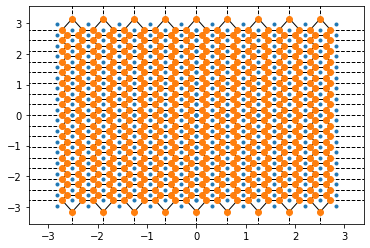

In [9]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = earth_array
vor = Voronoi(points)
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)

plt.show()

In [10]:
print ("Vertices: ",vor.vertices.shape)
#print ("Vertices: ",vor.vertices)
print(f"indices of voronoi vertices forming voroni ridges {vor.ridge_vertices}")


Vertices:  (612, 2)
indices of voronoi vertices forming voroni ridges [[10, 11], [11, 18], [8, 9], [9, 10], [8, 17], [17, 18], [12, 13], [13, 42], [20, 21], [12, 21], [20, 41], [41, 42], [18, 64], [21, 63], [11, 12], [63, 64], [55, 59], [17, 55], [59, 65], [64, 65], [56, 58], [56, 66], [57, 59], [57, 58], [65, 66], [76, 78], [25, 76], [25, 26], [26, 80], [78, 80], [27, 85], [27, 91], [85, 88], [88, 92], [91, 92], [86, 87], [86, 93], [88, 89], [87, 89], [92, 93], [94, 97], [94, 95], [95, 96], [96, 98], [97, 98], [90, 93], [90, 96], [91, 95], [69, 70], [70, 98], [28, 90], [28, 69], [-1, 103], [-1, 30], [30, 31], [31, 103], [-1, 77], [-1, 76], [77, 78], [-1, 37], [-1, 39], [37, 40], [39, 40], [-1, 32], [30, 33], [32, 33], [-1, 99], [-1, 29], [29, 101], [99, 101], [37, 100], [99, 100], [-1, 24], [-1, 3], [3, 4], [4, 24], [105, 110], [105, 106], [106, 107], [107, 109], [108, 109], [108, 110], [35, 36], [33, 36], [32, 110], [35, 105], [-1, 108], [24, 109], [100, 115], [101, 102], [102, 114],

--
[[537, 419, 385, 365, 363, 535], [384, 238, 239, 379, 378, 383], [527, 391, 240, 521, 518, 526], [525, 386, 104, 34, 118, 524], [110, 105, 106, 107, 109, 108], [419, 385, 383, 384, 382, 418], [391, 240, 239, 238, 237, 389], [528, 523, 524, 525, 526, 527], [119, 35, 105, 106, 34, 118], [108, 613, 612, 32, 110], [537, 419, 418, 417, 416, 536], [384, 238, 237, 113, 164, 382], [528, 388, 390, 389, 391, 527], [524, 118, 119, 360, 359, 523], [110, 32, 33, 36, 35, 105], [418, 382, 164, 163, 162, 417], [390, 111, 112, 113, 237, 389], [528, 388, 495, 499, 359, 523], [361, 222, 36, 35, 119, 360], [33, 32, 615, 614, 30], [425, 416, 417, 162, 213, 423], [217, 163, 164, 113, 112, 216], [496, 117, 111, 390, 388, 495], [500, 362, 361, 360, 359, 499], [223, 31, 30, 33, 36, 222], [354, 217, 163, 162, 213, 352], [228, 216, 112, 111, 117, 226], [500, 498, 497, 496, 495, 499], [362, 225, 224, 223, 222, 361], [30, 617, 616, 103, 31], [424, 214, 351, 352, 213, 423], [355, 227, 228, 216, 217, 354], [566, 

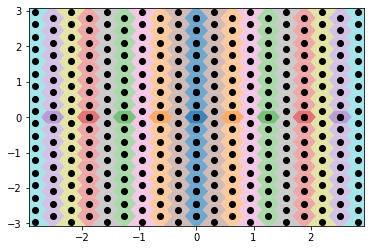

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# make up data points
np.random.seed(1234)
points = earth_array

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
regions, vertices = voronoi_finite_polygons_2d(vor)
print ("--")
print (regions)
print ("--")
print (vertices)
print ("Vertices: ",vor.vertices)
#import pdb
#pdb.set_trace()

# colorize
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

In [12]:
#compute edges based on the above
edges = []
for region in regions:
    prev = region[-1]
    for now in region:
        if (vertices[prev][0]< math.pi) and (vertices[prev][1]< math.pi) and (vertices[now][0]< math.pi) and (vertices[prev][1]< math.pi):
            if (vertices[prev][0]> -math.pi) and (vertices[prev][1]> -math.pi) and (vertices[now][0]>- math.pi) and (vertices[prev][1]>- math.pi):
                edges.append([vertices[prev].tolist(), vertices[now].tolist()])
        prev = now
print(edges)

[[[-0.20556100079044326, 0.0], [-0.10859826456853608, 0.17453292519943295]], [[-0.10859826456853608, 0.17453292519943295], [0.10859826456853604, 0.17453292519943295]], [[0.10859826456853604, 0.17453292519943295], [0.20556100079044326, 0.0]], [[0.20556100079044326, 0.0], [0.10859826456853604, -0.17453292519943295]], [[0.10859826456853604, -0.17453292519943295], [-0.10859826456853604, -0.17453292519943295]], [[-0.10859826456853604, -0.17453292519943295], [-0.20556100079044326, 0.0]], [[0.42275752992751536, 0.0], [0.5197202661494226, 0.17453292519943295]], [[0.5197202661494226, 0.17453292519943295], [0.7369167952864947, 0.17453292519943295]], [[0.7369167952864947, 0.17453292519943295], [0.8338795315084019, -0.0]], [[0.8338795315084019, -0.0], [0.7369167952864947, -0.17453292519943295]], [[0.7369167952864947, -0.17453292519943295], [0.5197202661494226, -0.17453292519943295]], [[0.5197202661494226, -0.17453292519943295], [0.42275752992751536, 0.0]], [[1.4621980622263606, 0.0], [1.3652353260

In [ ]:
edges2 = []
for vertex in vor.ridge_vertices:
    if vertex != -1:
        vor.vertices


In [13]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
test_1= [math.pi/2, math.pi]
test_2= [math.pi/2, 0]
print(haversine_distances( [test_1, test_2]))


[[0.0000000e+00 1.2246468e-16]
 [1.2246468e-16 0.0000000e+00]]
